In [1]:
import matplotlib
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#  #한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf" # Windows
# font_location = "/System/Library/fonts/AppleSDGothicNeo.ttc"  # Mac OS
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
crimes = pd.read_csv('nightlife_crime.csv', encoding='euc-kr')

In [4]:
#산점도 그리기 함수
def get_plot(x, y):
    temp = crimes.loc[:, (x,y)]
    plt.plot(temp[x], temp[y], 'bo')
    plt.title('%s 와 %s의 산점도' %(x,y))
    plt.xlabel(x)
    plt.ylabel(y)
    return plt.show()

In [5]:
#피어슨 상관계수 함수
def get_pearson_value(x,y):
    temp = crimes.loc[:, (x,y)]
    return temp.corr(method='pearson')

In [6]:
#지역별 범죄 발생건 수에 대한 t-검정
def ttest_by_regions(works, beds):
    work_and_crimes = crimes.loc[
    (crimes['region'].isin(works)),
    ('thef', 'violence' , 'robbery' ,'murder','forcible_rape')]

    bed_and_crimes = crimes.loc[
    (crimes['region'].isin(beds)),
    ('thef', 'violence', 'robbery', 'murder', 'forcible_rape')]
    tTestResult = stats.ttest_ind(bed_and_crimes, work_and_crimes)
    return tTestResult

In [7]:
def ttest_by_crime_type(c1, c2):
    temp1 = crimes.loc[:, (c1)]
    temp2 = crimes.loc[:, (c2)]
    
    tTestResult = stats.ttest_ind(temp1,temp2)
    return tTestResult

# 청소년 범죄 유형 비율

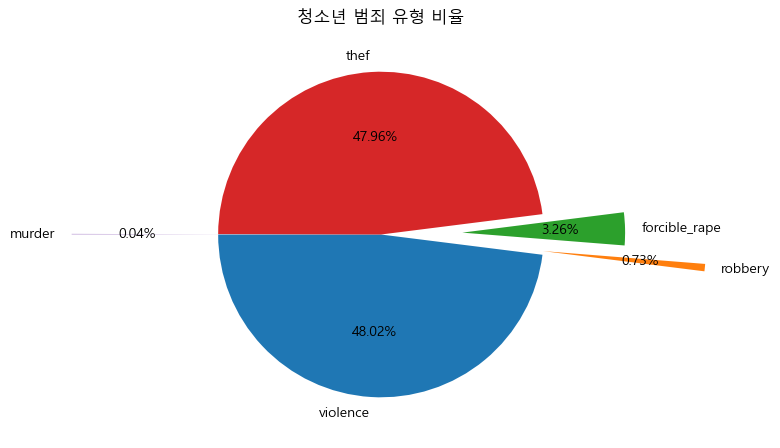

In [8]:
cols = ['violence','robbery','forcible_rape','thef','murder']
teens_crime_types_sum = crimes[cols].sum(axis = 0, numeric_only=True)
#print(teens_crime_types_sum)

# teens_crime_types_sum.plot.bar(stacked=True, figsize=(10,7))
explode = [0,1,0.5, 0.0, 0.9]

teens_crime_types_sum.plot.pie(
    y = teens_crime_types_sum.index,
    shadow = False,
    startangle = 180,
    explode = explode,
    autopct='%.2f%%',
)
plt.title('청소년 범죄 유형 비율')
plt.tight_layout()
plt.show()

청소년 범죄 유형에는 폭력이 가장 많았고, 그 뒤를 잇는 것은 절도입니다

# 범죄별 청소년 가해자 비율

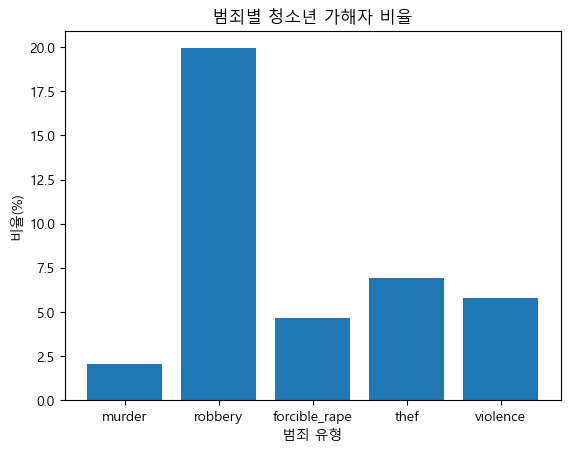

In [9]:
cols = ['murder','robbery','forcible_rape','thef','violence']
cols_tot = ['murder_tot', 'robbery_Tot','forcible_rape_Tot','thef_tot','violence_Tot']
teens_crime_types_sum = crimes[cols].sum(axis = 0, numeric_only=True)
tot_crime_types_sum = crimes[cols_tot].sum(axis=0, numeric_only=True)

ratio = teens_crime_types_sum.values / tot_crime_types_sum.values
plt.bar(cols, ratio*100)
plt.xlabel('범죄 유형')
plt.ylabel('비율(%)')
plt.title('범죄별 청소년 가해자 비율')
plt.show()

---

# 유흥업소 수와 범죄

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\AppData\Local\Temp\ipykernel_15388\3070532057.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


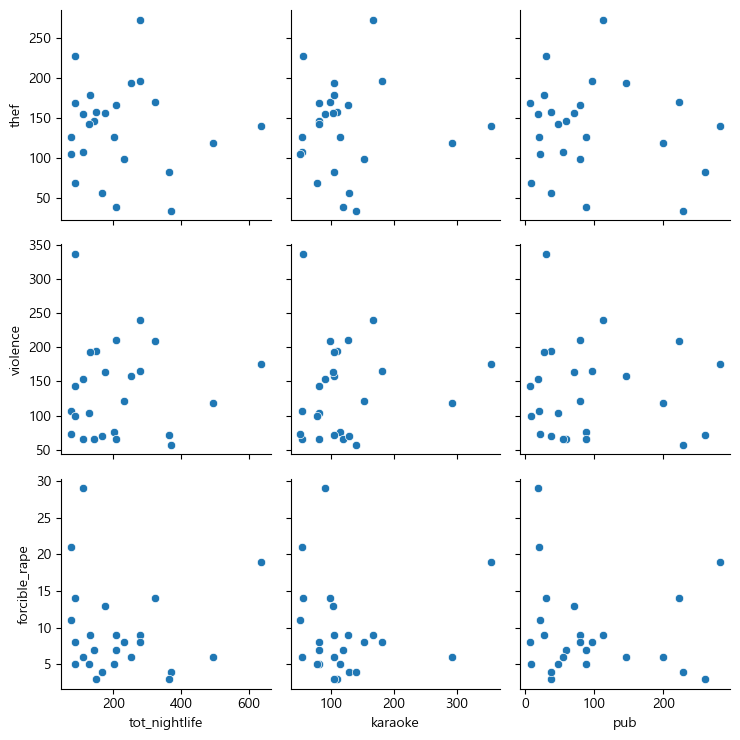

In [10]:
sns.pairplot(
    crimes, 
    x_vars=['tot_nightlife','karaoke','pub'],
    y_vars=['thef', 'violence', 'forcible_rape']
)
plt.title
plt.tight_layout()
plt.show()

# 주요 범죄 유형 간의 관계

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\admin\AppData\Local\Temp\ipykernel_15388\935233414.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


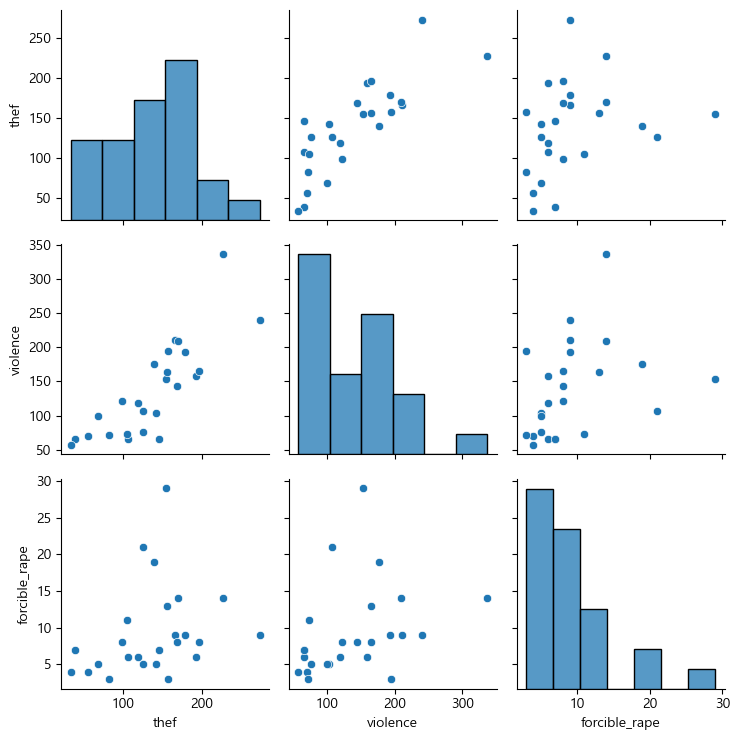

In [11]:
sns.pairplot(
    crimes, 
    x_vars=['thef', 'violence', 'forcible_rape'],
    y_vars=['thef', 'violence', 'forcible_rape']
)
plt.title('')
plt.tight_layout()
plt.show()

<Axes: >

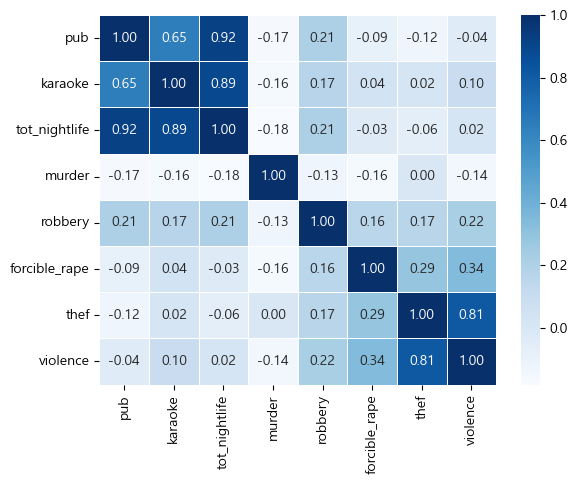

In [12]:
sns.heatmap(data = crimes.iloc[:,1:9].corr(),annot=True,
            fmt = '.2f', linewidths=.5, cmap='Blues')

# 가설1
## 업무 지구와, 주거지역의 청소년 범죄 건수에 차이가 있는지, 그 차이가 유의미한지

**귀무가설: 두 집단의 평균의 차이가 0이다.** <br/>
**대립가설: 두 집단의 평균의 차이가 0이 아니다.** <br/>

In [13]:
work_towns =  ['종로' ,'중구', '강서', '구로', '금천', '영등포' , '강남']
bed_towns = ['은평', '성북', '노원', '강북', '양천' ,'강동' , '도봉']
print(ttest_by_regions(work_towns, bed_towns))

TtestResult(statistic=array([0.40149438, 0.87016072, 0.1088931 ,        nan, 0.95454792]), pvalue=array([0.69511419, 0.40128415, 0.91508698,        nan, 0.35864048]), df=array([12., 12., 12., 12., 12.]))


In [14]:
print(ttest_by_crime_type('robbery', 'violence'))

TtestResult(statistic=-9.823875415197882, pvalue=4.5169558479602484e-13, df=48.0)


In [15]:
print(ttest_by_regions(['중구' ,'종로'], ['은평' , '성북']))

TtestResult(statistic=array([ 0.91866483,  3.52803895, -2.82842712,         nan,  1.8973666 ]), pvalue=array([0.45525094, 0.07179554, 0.10557281,        nan, 0.19821627]), df=array([2., 2., 2., 2., 2.]))


In [16]:
print(get_pearson_value('robbery' , 'violence'))
print(get_pearson_value('robbery' , 'thef'))
print(get_pearson_value('thef' , 'violence'))

           robbery  violence
robbery   1.000000  0.223769
violence  0.223769  1.000000
          robbery      thef
robbery  1.000000  0.168731
thef     0.168731  1.000000
              thef  violence
thef      1.000000  0.811187
violence  0.811187  1.000000
